In [1]:
from os.path import abspath, join
import sys
from glob import glob 
import vaex
import numpy as np
root_dir = abspath(join('..', '..'))
root_data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import (mcmc, plot_chain, plot_corner, 
                   plot_fit_z, calculate_prob, 
                   get_params, get_data, style)

In [2]:
style()

In [3]:
z_dir_path = join(root_dir, 'Data', 'Effective-Volume-no')
w_dir_path = join(root_dir, 'Data', 'Velocity-Distribution-no')
phi_dir_path = join(root_dir, 'Data', 'PHI')
z_dir_path, w_dir_path, phi_dir_path

('/home2/s20321005/Thesis-Project/Data/Effective-Volume-no',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no',
 '/home2/s20321005/Thesis-Project/Data/PHI')

In [4]:
index = 0

result = mcmc() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path) \
  .model("DDDM") \
  .step0(100) \
  .step(200) \
  .thin(2) \
  .run(it=2)

result.keys()

running...
mcmc...


mcmc:   0%|          | 0/2 [00:00<?, ?it/s]

0: first half mcmc done 13.35 s


mcmc:  50%|█████     | 1/2 [00:27<00:27, 27.39s/it]

0: second half mcmc done 13.86 s
1: first half mcmc done 13.38 s


mcmc: 100%|██████████| 2/2 [00:53<00:00, 26.99s/it]

1: second half mcmc done 13.08 s


dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [5]:
indexes, labs, labels, chain = result.values()
indexes, labs, labels

([12, 24, 25, 26, 27, 28, 29],
 array(['rhob', 'rhoDM', 'sigmaDD', 'hDD', 'log_nu0', 'R', 'zsun'],
       dtype='<U32'),
 array(['$\\rho_{b}$', '$\\rho_{\\textup{DM}}$',
        '$\\sigma_{\\textup{DD}}$', '$h_{\\textup{DD}}$', '$\\log \\nu_0$',
        '$R$', '$z_{\\odot}$'], dtype='<U32'))

7it [00:02,  2.87it/s]


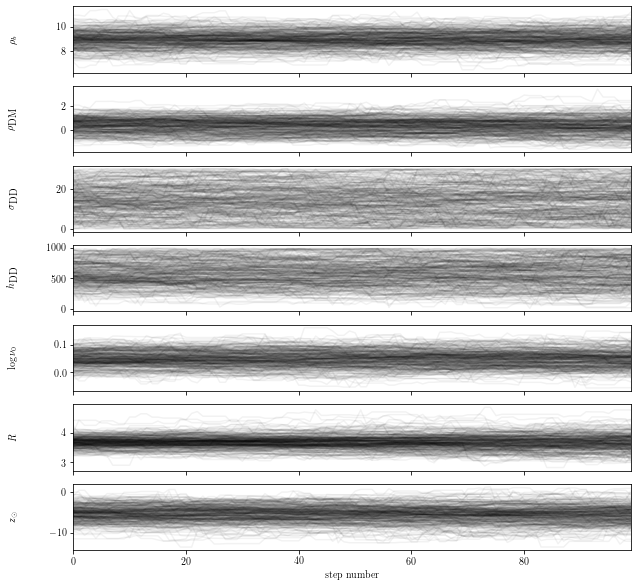

In [6]:
params = get_params(chain, indexes, labs)
plot_chain() \
  .params(params) \
  .labels(labels) \
  .alpha(0.05) \
  .run()

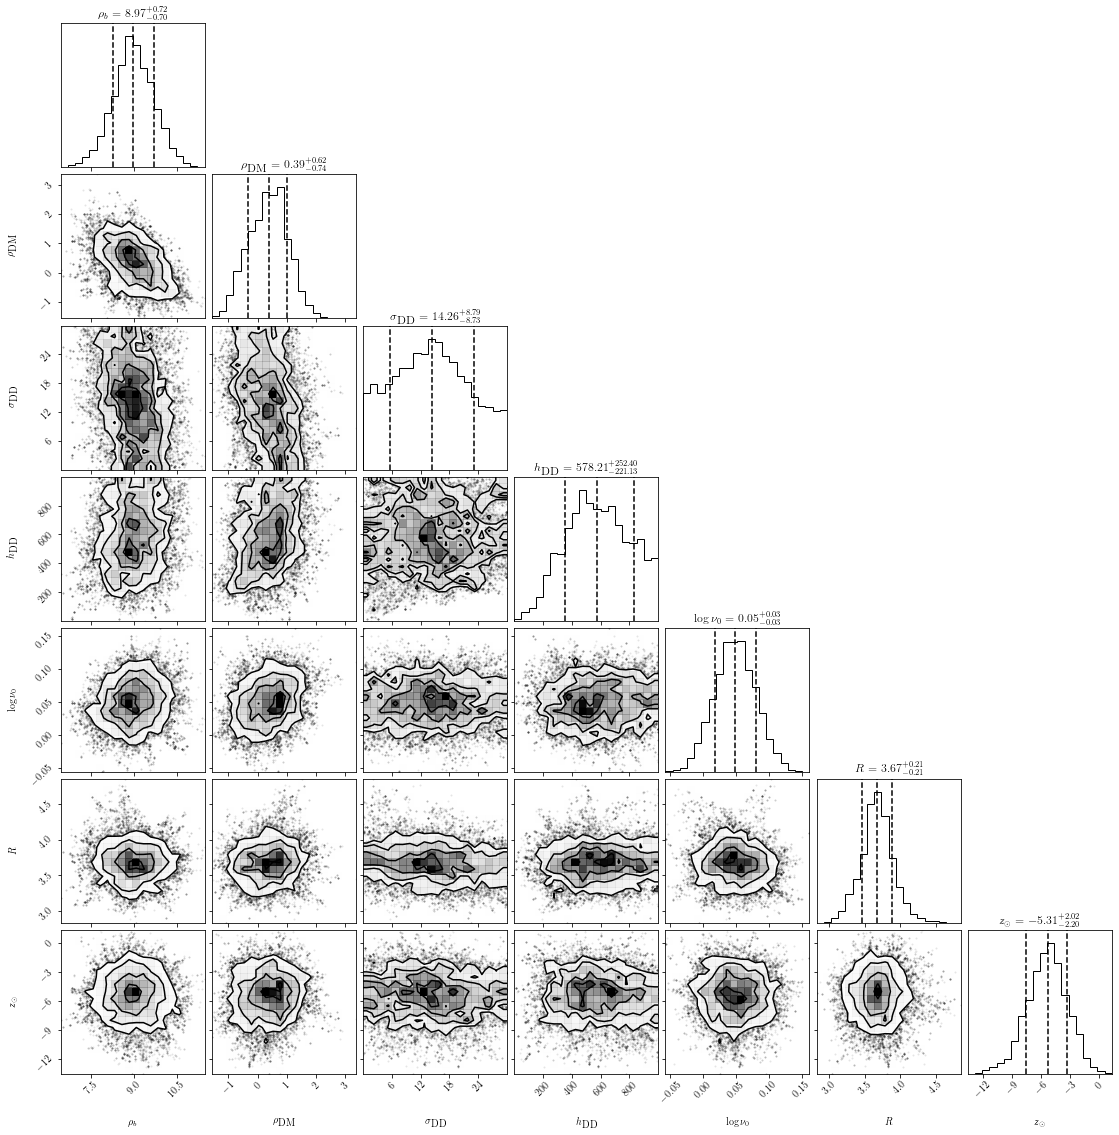

In [7]:
plot_corner() \
  .params(params) \
  .labels(labels) \
  .run()

In [8]:
ndim = chain.shape[2]
flat_sample = chain.reshape((-1, ndim))
zdata = get_data(z_dir_path, index, "z")
zmid = zdata[0]
zmax = np.max(np.abs(zmid))*2
flat_sample.shape

(29800, 30)

100%|██████████| 9/9 [00:01<00:00,  8.34it/s]


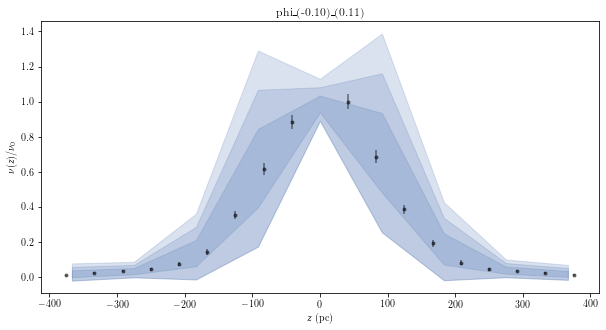

In [9]:
plot_fit_z() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path)  \
  .flat(flat_sample) \
  .zmax(zmax) \
  .model("DDDM") \
  .res(10) \
  .nsample(100) \
  .run()

In [10]:
ndim = chain.shape[2]
flat_sample = chain.reshape((-1, ndim))

calculate_prob() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path) \
  .model("DDDM")  \
  .flat(flat_sample) \
  .path("tes.txt") \
  .run()

running...
opening pred file...
opening phis file...
Calculating likelihood
max log-likelihood: 120.68472691812772
BIC: -15.616431452481436
AIC: -181.36945383625545


# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.